**Задача А.
Даны результаты нескольких измерений: 7 6 8 5 5 6 9 4 8 9**

1) Определите доверительную вероятность получения оценки среднего значения измеряемой величины
с точностью е = 1


In [ ]:
import numpy as np

# Задаем данные
data = np.array([10, 13, 10, 14, 9, 7, 11, 8, 12, 13])

In [ ]:
data = np.array(data)

mean = np.mean(data)

std_dev = np.std(data)

confidence_interval = std_dev / np.sqrt(len(data))

print(f"Доверительная вероятность: {confidence_interval}")

Доверительная вероятность: 0.693279164550616


2) Найдите число измерений необходимых для получения среднего значения с точностью e = 0.25 и
доверительной вероятностью Р=0,995


In [ ]:
from scipy.stats import norm

# Точность
epsilon = 0.25

# Доверительная вероятность
alpha = 1 - 0.995

# Расчет стандартного отклонения
std_dev = np.std(data, ddof=1)

# Расчет числа измерений
n = np.ceil((norm.ppf(1 - alpha / 2) * std_dev / epsilon)**2)

print(f"Число измерений: {n}")

Число измерений: 6121.0


**Задача Б. В результате наблюдения было получено 100 значений признака, составляющих выборку из
генеральной совокупности. Выполните задания:**

110 114 100 110 117 109 117 94 116 107
110 95 122 122 115 102 116 119 116 118
115 118 106 103 116 110 109 121 123 97
113 110 119 107 93 104 115 101 121 111
107 123 109 120 100 111 110 109 106 119
105 110 123 106 95 107 105 118 114 109
100 120 107 118 110 99 117 110 104 113
108 113 105 110 117 116 111 104 115 110
98 104 110 117 113 114 107 113 107 101
112 108 116 110 111 103 111 115 110 108

1) Найдите выборочное среднее, выборочную дисперсию, среднеквадратическое отклонение; размах
данных; максимум и минимум.


#Ашуров Георгий, ИУ5-61Б, Вариант 50.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Создаем DataFrame из данных
data = [110, 114, 100, 110, 117, 109, 117, 94, 116, 107,
        110, 95, 122, 122, 115, 102, 116, 119, 116, 118,
        115, 118, 106, 103, 116, 110, 109, 121, 123, 97,
        113, 110, 119, 107, 93, 104, 115, 101, 121, 111,
        107, 123, 109, 120, 100, 111, 110, 109, 106, 119,
        105, 110, 123, 106, 95, 107, 105, 118, 114, 109,
        100, 120, 107, 118, 110, 99, 117, 110, 104, 113,
        108, 113, 105, 110, 117, 116, 111, 104, 115, 110,
        98, 104, 110, 117, 113, 114, 107, 113, 107, 101,
        112, 108, 116, 110, 111, 103, 111, 115, 110, 108]
df = pd.DataFrame(data, columns=['Value'])

# Вычисляем статистические показатели
mean = df['Value'].mean()
variance = df['Value'].var()
std_dev = df['Value'].std()
range_data = df['Value'].max() - df['Value'].min()
max_value = df['Value'].max()
min_value = df['Value'].min()

print(f"Выборочное среднее: {mean}")
print(f"Выборочная дисперсия: {variance}")
print(f"Среднеквадратическое отклонение: {std_dev}")
print(f"Размах данных: {range_data}")
print(f"Максимум: {max_value}")
print(f"Минимум: {min_value}")

Выборочное среднее: 110.42
Выборочная дисперсия: 48.549090909090914
Среднеквадратическое отклонение: 6.967717769046828
Размах данных: 30
Максимум: 123
Минимум: 93


2) Оцените математическое ожидание генеральной совокупности с помощью доверительного интервала
с надёжностями 0,95; 0,99; 0,999.


In [ ]:
from scipy.stats import t

# Количество измерений
n = len(df)

# Вычисляем доверительные интервалы

# Для 0.95
alpha = 1 - 0.95
confidence_interval_95 = t.interval(1 - alpha, n - 1, loc=mean, scale=std_dev / np.sqrt(n))

# Для 0.99
alpha = 1 - 0.99
confidence_interval_99 = t.interval(1 - alpha, n - 1, loc=mean, scale=std_dev / np.sqrt(n))

# Для 0.999
alpha = 1 - 0.999
confidence_interval_999 = t.interval(1 - alpha, n - 1, loc=mean, scale=std_dev / np.sqrt(n))

print(f"Доверительный интервал с надёжностями 0.95: {confidence_interval_95}")
print(f"Доверительный интервал с надёжностями 0.99: {confidence_interval_99}")
print(f"Доверительный интервал с надёжностями 0.999: {confidence_interval_999}")

Доверительный интервал с надёжностями 0.95: (109.03745362893291, 111.8025463710671)
Доверительный интервал с надёжностями 0.99: (108.58999480328234, 112.25000519671767)
Доверительный интервал с надёжностями 0.999: (108.05687842291778, 112.78312157708226)


3) Постройте гистограмму частот.

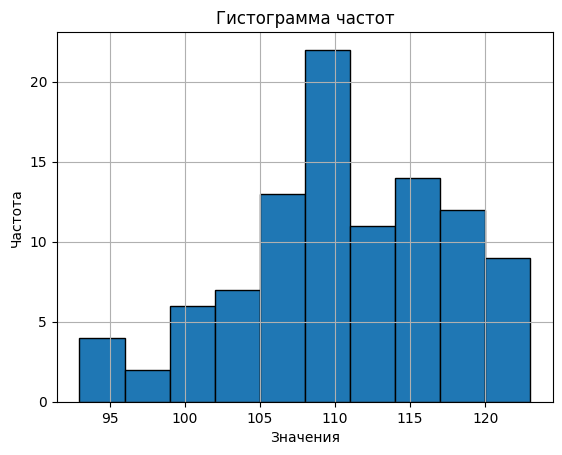

In [ ]:
import matplotlib.pyplot as plt

df['Value'].hist(bins=10, edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма частот')
plt.show()

4) Постройте график плотности нормального распределения с параметрами выборки.


<ipython-input-47-32e1fde03954>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Value'], fit=stats.norm, kde=False, bins=int(180/5), color = 'darkblue',


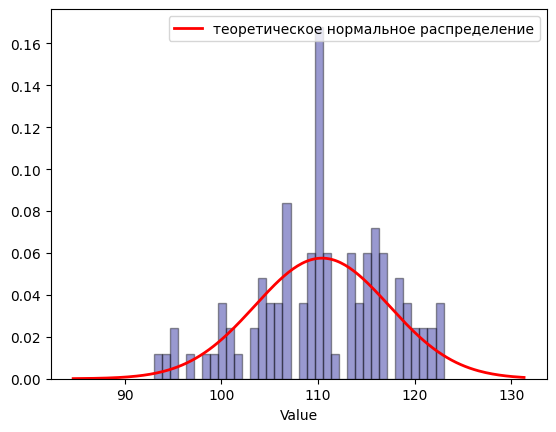

In [ ]:
mu, std = df['Value'].mean(), df['Value'].std()
sns.distplot(df['Value'], fit=stats.norm, kde=False, bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             fit_kws={"color": "red", "lw":2, "label": "теоретическое нормальное распределение"})
plt.legend()
plt.show()


5) Постройте диаграмму размаха данных (в Python – график boxplot; в Excel – биржевая диаграмма,
блочная диаграмма с ограничителями - показывает распределение данных по квартилям с выбросами).

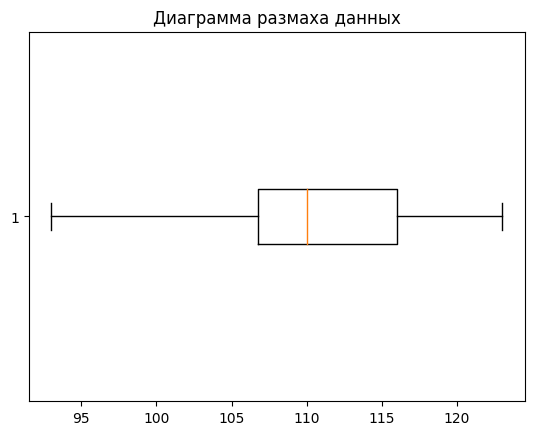

In [ ]:
plt.boxplot(df['Value'], vert=False)
plt.title('Диаграмма размаха данных')
plt.show()


6) Примените критерий Пирсона χ2
с уровнем значимости 0,05 для проверки гипотезы о нормальном
распределении генеральной совокупности. Сделайте вывод о принятии основной гипотезы.

In [ ]:
from scipy.stats import chisquare

# Разбиваем данные на квартили
quartiles = np.percentile(data, [25, 50, 75])
# Подсчитываем количество значений в каждом квартиле
counts = np.histogram(data, bins=[quartiles[0], quartiles[1], quartiles[2], max(data)])[0]

# Применяем критерий Пирсона χ2
chi2, p = chisquare(counts)

print(f"Значение χ2: {chi2}, p-значение: {p}")
if p > 0.05:
  print("Принимаем основную гипотезу о нормальном распределении.")
else:
  print("Отклоняем основную гипотезу о нормальном распределении.")


Значение χ2: 6.720000000000001, p-значение: 0.03473525894473856
Отклоняем основную гипотезу о нормальном распределении.


**Задание B**

113,19 111,77 111,38 106,92 106,39 104,61 106,13 109,96 92,31 96,24
113,22 107,28 106,39 104,61 111,14 104,35 104,15 113,52 92,87 96,80
109,63 104,97 111,14 104,35 113,78 107,91 105,17 112,79 93,43 97,37
118,27 104,12 113,78 107,91 112,61 112,46 109,56 108,93 93,99 100,54
108,08 107,12 112,28 106,13 107,91 113,65 113,36 112,79 94,56 100,57
112,56 111,84 107,91 104,15 110,25 110,68 113,03 107,48 95,12 103,22
108,57 113,78 110,25 105,17 106,92 108,57 109,30 105,14 95,68 105,86

1) Сравните распределения выборок Б и В с помощью критерия Колмогорова-Смирнова.
Сделайте вывод о принятии основной гипотезы.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
# Ваши данные
data_B = np.array([110, 114, 100, 110, 117, 109, 117, 94, 116, 107,
        110, 95, 122, 122, 115, 102, 116, 119, 116, 118,
        115, 118, 106, 103, 116, 110, 109, 121, 123, 97,
        113, 110, 119, 107, 93, 104, 115, 101, 121, 111,
        107, 123, 109, 120, 100, 111, 110, 109, 106, 119,
        105, 110, 123, 106, 95, 107, 105, 118, 114, 109,
        100, 120, 107, 118, 110, 99, 117, 110, 104, 113,
        108, 113, 105, 110, 117, 116, 111, 104, 115, 110,
        98, 104, 110, 117, 113, 114, 107, 113, 107, 101,
        112, 108, 116, 110, 111, 103, 111, 115, 110, 108])
data_C = np.array([
    113.19, 111.77, 111.38, 106.92, 106.39, 104.61, 106.13, 109.96, 92.31, 96.24,
    113.22, 107.28, 106.39, 104.61, 111.14, 104.35, 104.15, 113.52, 92.87, 96.80,
    109.63, 104.97, 111.14, 104.35, 113.78, 107.91, 105.17, 112.79, 93.43, 97.37,
    118.27, 104.12, 113.78, 107.91, 112.61, 112.46, 109.56, 108.93, 93.99, 100.54,
    108.08, 107.12, 112.28, 106.13, 107.91, 113.65, 113.36, 112.79, 94.56, 100.57,
    112.56, 111.84, 107.91, 104.15, 110.25, 110.68, 113.03, 107.48, 95.12, 103.22,
    108.57, 113.78, 110.25, 105.17, 106.92, 108.57, 109.30, 105.14, 95.68, 105.86
])

KS, p_value = stats.ks_2samp(data_B, data_C)
print(f"KS-статистика: {KS}, p-значение: {p_value}")

KS-статистика: 0.3357142857142857, p-значение: 0.0001270768869551577


2) Постройте график распределения (CDF) этой выборки.

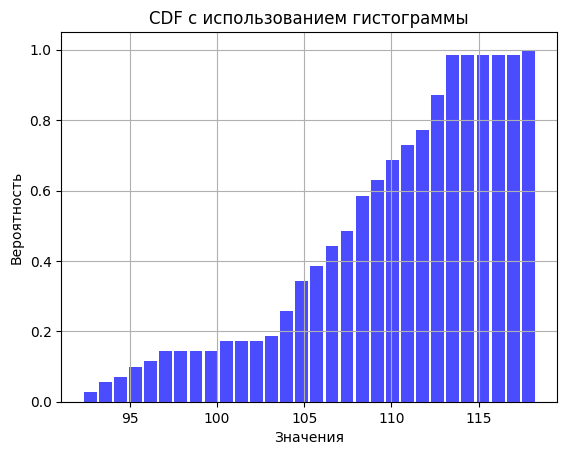

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Пример использования для выборки В
plt.hist(data_C, bins=30, cumulative=True, color='blue', alpha=0.7, rwidth=0.85, density=True)
plt.title('CDF с использованием гистограммы')
plt.xlabel('Значения')
plt.ylabel('Вероятность')
plt.grid(True)
plt.show()


3) Постройте график эмпирической функции плотности (полигон частот) этой выборки.

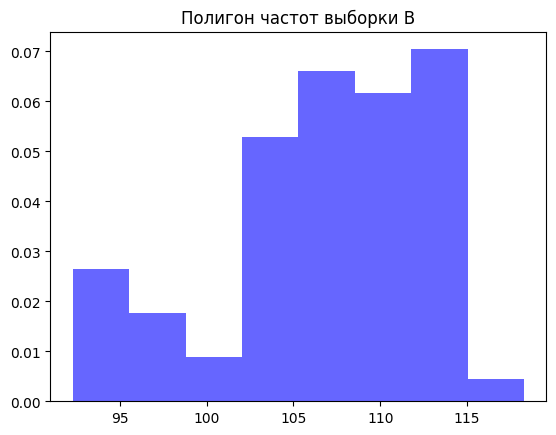

In [ ]:
plt.hist(data_C, bins='auto', density=True, alpha=0.6, color='b')
plt.title('Полигон частот выборки В')
plt.show()